# The harmonic oscillator and introduction to the quantumWorld library

## Introduction

Throughout the first weeks of classes, we have learned how to define functions.  We have also built functions repeatedly so far and and will be throughout the course.  Why rewrite them every time we need them if we can **create our own python module and import these functions** whenever we need?

In this iPython notebook we'll learn how to import the set of functions that we have written (and that we'll keep updating) in the file quantumWorld.py. We'll also get familiar with the quantum harmonic oscillator and its eigenfunctions. 

We'll **review** some of the stuff you've learned so far : 

1.  Plotting with iPython.
2. Importing libraries and reading documentation in iPython.

And we'll play around with some **new concepts** :

1.  The quantumWorld library.
2.  Solutions to the 1D quantum harmonic oscillator.

## Before you start ...

In addition to the symbols <i class="fa fa-book"></i> and <i class="fa fa-wrench"></i> that you saw in the previous demo, we have added a third one: <i class="fa fa-gear"></i>. When you see <i class="fa fa-gear"></i>, a question will be posted to call your attention towards certain result or concept. Stop coding and start theorizing!

## Have fun!

## <i class="fa fa-book"></i> Step 1: Importing libraries.

Here is what we usually import:

In [1]:
% matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

We'll use the lines below now to import our quantumWorld.py, calling it qworld:

In [2]:
#Now we'll import a module that let us specify the path to our quantumWorld library, and import it as a module
import imp
#This is how we'll import our own homemade modules
qworld = imp.load_source('qworld', '../library/quantumWorld.py')

## <i class="fa fa-book"></i> Step 2: Getting familiar with the functions inside quantumWorld.

In order to find out what's inside our library of functions, we can use the following lines of code:

The following will print out a list with the names of all of the functions that are in the library


In [3]:
dir(qworld)

['HTML',
 'NamedTemporaryFile',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 'analytical_E_n_1D_PIB',
 'box_1D_eigenfunction',
 'chem160_plotting',
 'embedAnimation',
 'embedVideo',
 'harmonic_oscillator_V',
 'harmonic_oscillator_wf',
 'misc',
 'np',
 'numerical_second_derivative',
 'ode_integrate',
 'plt',
 'probabilityDensity',
 'simps',
 'verlet']

And the pydoc module will let us print out the documentation for all the available functions

In [4]:
help(qworld)

Help on module qworld:

NAME
    qworld

FILE
    /home/student/Chem160_v2/library/quantumWorld.py

DESCRIPTION
    This is a library of functions that we've created over time in Che160 course
    By importing this library of functions into any ipython notebook, you can save some
    time by not having to write or copy and pastethe functions again
    
    To import all of the functions in this library into a notebook, do the following:
    
    from Chem160_library import *
    
    or if you just want to import a single function
    
    from Chem160_library import usefulFunctionName

FUNCTIONS
    analytical_E_n_1D_PIB(n, L, h_bar=1, m=1)
        This function returns energy of the nth eigenstate
        of the 1D particle in a box.
        Input:
            -- n : quantum number specifying which eigenstate
            -- L, length of the box
    
    box_1D_eigenfunction(x, L, n)
        given x, L, and n returns an eigenfunction for the 1D particle in a box
        Inputs: x -- n

If you want to print out the documentation for a single function, you can call the pydoc.doc() function, but use as input the function you are interested in 

```python
help(quantumWorld.FUNCTION_NAME)
```

In [5]:
# print out the documentation for the 1D particle in a box function inside our library 
help(qworld.box_1D_eigenfunction)

Help on function box_1D_eigenfunction in module qworld:

box_1D_eigenfunction(x, L, n)
    given x, L, and n returns an eigenfunction for the 1D particle in a box
    Inputs: x -- numpy array.
            L -- scalar, length of the box.
            n -- intenger



## <i class="fa fa-wrench"></i> Step 3:  Plotting the Harmonic Oscillator Potential $V(x)$
Now let's start calling some of the functions that we've written in quantumWorld. 

We'll plot a harmonic potential, defined as: $$V(x) = V(x_0) + \frac{1}{2}m\omega^2(x - x0)^2$$

By calling a function that we've provided in the quantumWorld module, called harmonic_oscillator_V (from V, the potential).

**Print out the documentation for quantumWorld.harmonic_oscillator_V**


In [6]:
# PRINT THE DOCUMENTATION OF THE QUANTUM WORLD LIBRARY
# HINT: USE HELP
help(qworld.harmonic_oscillator_V)

Help on function harmonic_oscillator_V in module qworld:

harmonic_oscillator_V(x, m=1.0, omega=1.0, V_x0=0, x0=0)
    returns the potential for the 1D Harmonic Oscillator, given the following inputs:
    INPUTS:
        x --> a numpy array
        m --> mass, defaults to atomic units
        omega --> oscillator frequency, defaults to atomic units.
        V_x0 --> Lowest value of potential (shift in y - axis), defaults to 0
        x0 --> x value where potential has a minimum



**Now we will calculate the potential V(x) for three different values of $\omega$ and store it in a list. Pay attention to how we call the functions from the quantumWorld library.**

In [7]:
#Define a range of values of x. 
x = np.arange(-10, 10, 0.01)
m=1 #the mass of our particle

#Create a list of different values of omega
omega_list = [5,10,15]

#We'll store all of the potentials in this empty list
V_x_list = []

#For each value of omega, get the V(x), the harmonic oscillator potential
for omega in omega_list:
    #Notice how were calling the function that is part of the quantumWorld module/library
    V_x = qworld.harmonic_oscillator_V(x, m, omega)
    #Append it to the list of potentials
    V_x_list.append(V_x)

Now your task is to plot the three potentials in the list using a **for-loop**, all three in the same plot (just like you did in your first homework). We have already added some code, you will need just to complete the indicated line.

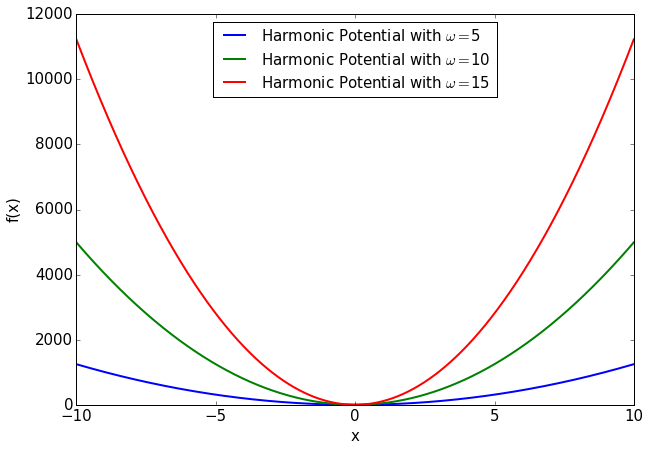

In [17]:
### ADD THE MISSING LINE IN THE FOR-LOOP
fts=15
lw=2
plt.figure(figsize=(10,7))
c=-1
for V_x in V_x_list:
    c+=1
    the_label='Harmonic Potential with $\omega=$'+str(omega_list[c])
    #### ADD 1 LINE OF CODE HERE TO PLOT V_x vs x ################
    #### remember to assign the label and change the line width to the lw value
    #### HINT: check your cheat sheet
    plt.plot(x,V_x,label=the_label,linewidth=lw)
    ###############################################
plt.legend(loc='upper center',fontsize=fts)
plt.ylabel('f(x)',fontsize=fts)
plt.xlabel('x',fontsize=fts)
plt.yticks(fontsize=fts)
plt.xticks(fontsize=fts)
plt.show()

##  <i class="fa fa-wrench"></i> Step 4:  Create a function to plot

Creating a single personalized plot requires a long paragraph of code. Copying and pasting the same code everytime you need to plot something would be pretty inefficient and it wouldn't look nice. 

When you need to execute the same code several times, just changing some paremeters, it is useful and more elegant to turn that code into a function. If you have a set of functions that you use frequently, you can put them into a library, from which you can call them, just like we did with our quantumWorld library. 

So now we will turn your code for plotting into a function. Complete the missing code. 

In [12]:
""""" DEFINE A FUNCTION THAT RECEIVE THE FOLLOWING INPUT:
    
    INPUTS (IN ORDER):
        - x: array with x values
        functions_list: list of functions you want to plot
        labels_list: list of labels. It should have the same size as functions_list
        title: title of the plot (Default: 'Plot')
        xlab: name of the xlabel (default: 'x')
        ylab: name of the ylabel (default: 'f(x)')
        fts: fontsize for legend, axes and labels (default: 12)
        lw: linewidth for the lines of the plot (default: 2)
        fs: figure size (default:(10,7))
        
    TO PLOT THE FUNCTIONS IN functions_list AS A FUNCTION OF x
"""""
# COMPLETE THE FUNCTION BELOW

def my_plotting_function(x,functions_list,labels_list,title='Plot',xlab='x',ylab='f(x)',fts=12,lw=2,fs=(10,8)):
    plt.figure(figsize=fs)
    c=-1
    # WRITE A FOR LOOP TO PLOT ALL THE FUNCTIONS IN functions_list (3 LINES of code)
    # use the integer c to assign the corresponding label from the labels_list
    # HINT: the code is similar to the one in the previous step
    for f_x in functions_list:
        c+=1
        plt.plot(x,f_x,label=labels_list[c],linewidth=lw)    
    plt.legend(loc='center left',fontsize=fts,bbox_to_anchor=(1, 0.5))
    plt.ylabel(ylab,fontsize=fts)
    plt.xlabel(xlab,fontsize=fts)
    plt.yticks(fontsize=fts)
    plt.xticks(fontsize=fts)
    plt.title(title,fontsize=fts)
    plt.show()
    plt.show()

Now we verify our plotting function is working well by executing the next box. It should generate a plot like in the one in step 3.

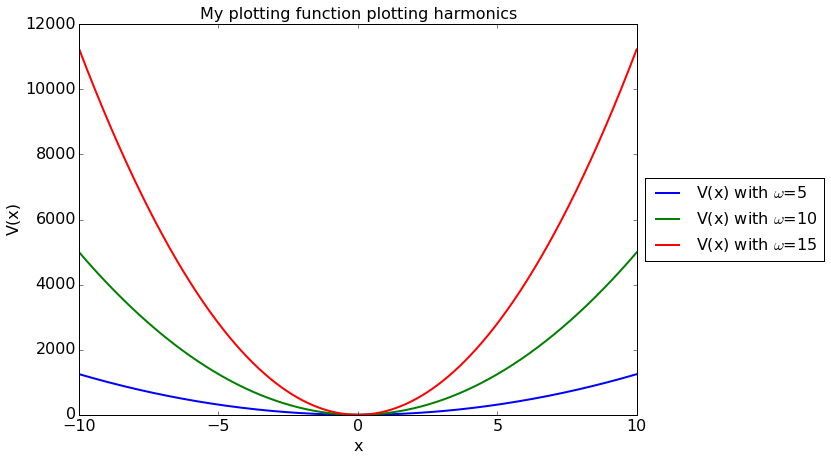

In [18]:
labels=['V(x) with $\omega$=5','V(x) with $\omega$=10','V(x) with $\omega$=15']
my_plotting_function(x,V_x_list,labels,title='My plotting function plotting harmonics',xlab='x',ylab='V(x)',fts=16,lw=2,fs=(10,7))

##  <i class="fa fa-wrench"></i> Step 4: Plotting the Harmonic Oscillator Eigenfunctions and PDFs for small quantum number such as n = 2

What does the eigenfunction and associated Probability Density Functions (PDFs) for the Harmonic Oscillator look like for a small value of n, say if n = 2? <br>

The general solution for the wavefunction of the 1D Harmonic Oscillator can be written as:

$$ \psi_n(x) = \frac{1}{\sqrt{2^n\,n!}} \cdot \left(\frac{m\omega}{\pi \hbar}\right)^{1/4} \cdot e^{- \frac{m\omega x^2}{2 \hbar}} \cdot H_n\left(\sqrt{\frac{m\omega}{\hbar}} x \right), \qquad n = 0,1,2,\ldots $$

where $n$ is the corresponding quantum number and the functions $H_n\left(x \right)$ represent the Hermite polynomials:

$$ H_n(x)=(-1)^n e^{x^2}\frac{d^n}{dx^n}\left(e^{-x^2}\right) $$

As you see, this function, although not difficult, might take a bit more time to code. To speed up the process of calculating the wavefunction and visualizing it we included a function called **harmonic_oscillator_wf** inside **quantumWorld** to obtain the wavefunction. We also have a function **probabilityDensity** to get the associated PDF.

First, print the documentation for these two functions (and **READ IT!!!**):

In [ ]:
#######(TWO LINES) PRINT THE DOCUMENTATION OF THE FUNCTIONS harmonic_oscillator_wf and probabilityDensity

#############################

Now use these two functions to get the wavefunction, the probability density function, and plot them. 

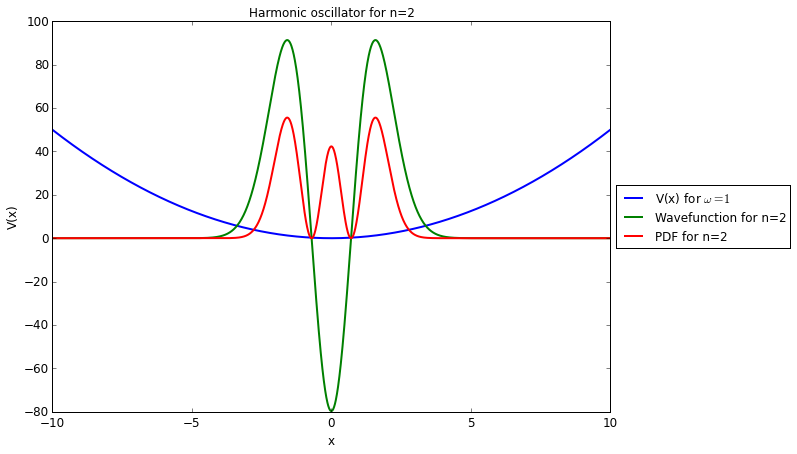

In [15]:
#let's define our values of n, omega, m
n=2
omega = 1
m=1 
hbar = 1

#Create your harmonic oscillator potential, which we'll plot below. 
V_x = qworld.harmonic_oscillator_V(x, m, omega)
#############################
### ONE LINE) WRITE A SINGLE LINE OF CODE THAT CALLS THE harmonic_oscillator_wf FUNCTION IN
### quantumWorld AND ASSIGNS IT TO A VARIABLE CALLED wf
wf = qworld.harmonic_oscillator_wf(x, n)
#############################

#Call probabilityDensity to obtain the pdf associated to this wavefunction 
pdf = qworld.probabilityDensity(wf)


#IN ORDER TO PLOT THE WAVEFUNCTION AND THE PDF OVERLAYED WITH THE HARMONIC POTENTIAL, 
# we'll multiply them by a scaling factor
#(Try setting it to 1, and you'll see how small the wavefunction and PDF look)
scaling_factor = (n+1)*max(V_x)

# DEFINE A LIST OF FUNCTIONS WITH the arrays V_x, wf and pdf (don't forget to multiply V_x and
# pdf by the scaling factor)
# (1 LINE)
f_list=[V_x,scaling_factor*wf,scaling_factor*pdf]

# DEFINE A LIST OF LABELS (WRITE DOWN THE LABELS AS STRINGS)
# (1 LINE)
labels=["V(x) for $\omega=1$",'Wavefunction for n=2','PDF for n=2']

# CALL YOUR PLOTTING FUNCTION TO CREATE THE PLOT
# (1 LONG LINE)
my_plotting_function(x,f_list,labels,title='Harmonic oscillator for n=2',xlab='x',ylab='V(x)',fts=12,lw=2,fs=(10,7))


##  <i class="fa fa-wrench"></i> Step 6:  Plot the Harmonic Oscillator PDF for a larger quantum number (n = 20) using your plotting function

Now use your plotting function to obtain the plot for n=20. First you will have to calculate the wavefunction and PDF for n=20 and put them into a list that your plotting function can use. After that create a list of labels and finally execute your plotting function to generate the plot.

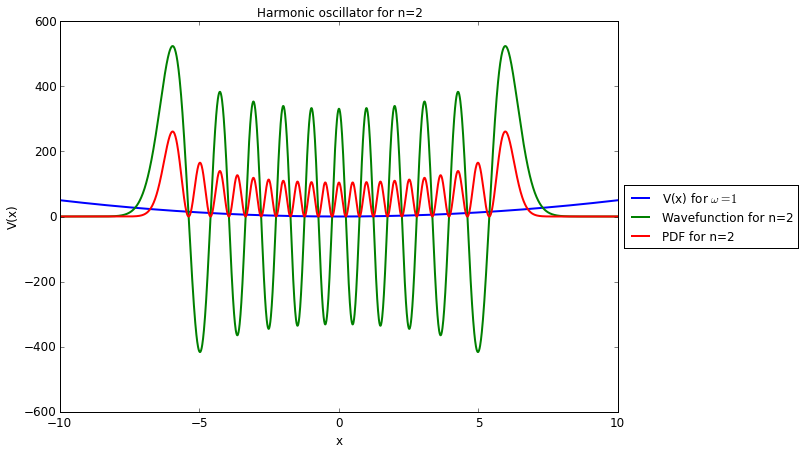

In [16]:
#let's define our values of n, omega, m
n=20
omega = 1
m=1 
hbar = 1

#Create your harmonic oscillator potential, which we'll plot below. 
V_x = qworld.harmonic_oscillator_V(x, m, omega)
#############################
### ONE LINE) WRITE A SINGLE LINE OF CODE THAT CALLS THE harmonic_oscillator_wf FUNCTION IN
### quantumWorld AND ASSIGNS IT TO A VARIABLE CALLED wf
wf = qworld.harmonic_oscillator_wf(x, n)
#############################

#Call probabilityDensity to obtain the pdf associated to this wavefunction 
pdf = qworld.probabilityDensity(wf)


#IN ORDER TO PLOT THE WAVEFUNCTION AND THE PDF OVERLAYED WITH THE HARMONIC POTENTIAL, 
# we'll multiply them by a scaling factor
#(Try setting it to 1, and you'll see how small the wavefunction and PDF look)
scaling_factor = (n+1)*max(V_x)

# DEFINE A LIST OF FUNCTIONS WITH the arrays V_x, wf and pdf (don't forget to multiply V_x and
# pdf by the scaling factor)
# (1 LINE)
f_list=[V_x,scaling_factor*wf,scaling_factor*pdf]

# DEFINE A LIST OF LABELS (WRITE DOWN THE LABELS AS STRINGS)
# (1 LINE)
labels=["V(x) for $\omega=1$",'Wavefunction for n=2','PDF for n=2']

# CALL YOUR PLOTTING FUNCTION TO CREATE THE PLOT
# (1 LONG LINE)
my_plotting_function(x,f_list,labels,title='Harmonic oscillator for n=2',xlab='x',ylab='V(x)',fts=12,lw=2,fs=(10,7))


Now that you have your plot you can compare it with the plot for n=2. What's happening with the PDF as $n$ increases? What is the physical meaning of the PDF? Based on your answers take a couple of minutes to think over the next question:

## <i class="fa fa-gear"></i> Question: Which PDF reminds you more of a classical oscillator?  Why? 

To help you answer this question check also this cool gif by Sbyrnes321 - 
(Own work. Licensed under CC0 via Commons - https://commons.wikimedia.org/wiki/File:QuantumHarmonicOscillatorAnimation.gif#/media/File:QuantumHarmonicOscillatorAnimation.gif)

(Now that you are an expert animating your plots, you could do things as cool as this one.)

![](files/QuantumHarmonicOscillatorAnimation.gif)

(A–B) show some classical trajectories for a harmonic oscillator (represented as a ball attached to a spring). In C–H, some solutions to the Schrödinger Equation are shown, where the horizontal axis is position, and the vertical axis is the real part (blue) or imaginary part (red) of the wavefunction. C-F are eigenstates (can you tell the values of $n$ ? Hint: count the number of nodes) and G-H are superpositions of eigenstates. 

## <i class="fa fa-book"></i> Step 7. What did you learn in this demo?

### 1. What is a library and why it is useful.

### 2. How to call and use the quantumWorld library.

### 3. The functional form of the solutions to the quantum 1D harmonic oscillator and the connection with the classical harmonic oscillator.

### 4. How to improve your plots and create functions for plotting.